In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Embedding,LSTM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Classifier=Sequential()

Classifier.add(Conv2D(64,(3,3),input_shape=(64,64,3),activation='relu'))

Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))

Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))

Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))

Classifier.add(Conv2D(32,(3,3),activation='relu'))

Classifier.add(GlobalMaxPooling2D())

Classifier.add(Flatten())

Classifier.add(Dense(units=104, activation='relu'))
Classifier.add(Dense(units=1, activation='sigmoid'))

Classifier.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.4,
                                   zoom_range = 0.3,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/archive (1) (1)/Covid19-dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 4,
                                                 class_mode = 'binary')

Found 251 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/archive (1) (1)/Covid19-dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 4,
                                            class_mode = 'binary')

Found 66 images belonging to 3 classes.


In [ ]:
history = Classifier.fit_generator(training_set,
                         steps_per_epoch = 40,
                         epochs = 7,
                         validation_data = test_set,
                         validation_steps = 8)

<ipython-input-9-88ef4db57dfd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = Classifier.fit_generator(training_set,


Epoch 1/7
40/40 [==============================] - 15s 232ms/step - loss: 0.5035 - accuracy: 0.3396 - val_loss: 0.4192 - val_accuracy: 0.3125
Epoch 2/7
40/40 [==============================] - 7s 186ms/step - loss: 0.4145 - accuracy: 0.2830 - val_loss: 0.1373 - val_accuracy: 0.3438
Epoch 3/7
40/40 [==============================] - 7s 180ms/step - loss: -0.2957 - accuracy: 0.2704 - val_loss: -0.8064 - val_accuracy: 0.3125
Epoch 4/7
40/40 [==============================] - 7s 177ms/step - loss: -24.6416 - accuracy: 0.3648 - val_loss: -92.0996 - val_accuracy: 0.3125
Epoch 5/7
40/40 [==============================] - 7s 172ms/step - loss: -258.9273 - accuracy: 0.3774 - val_loss: -2295.6196 - val_accuracy: 0.4375
Epoch 6/7
40/40 [==============================] - 8s 191ms/step - loss: -5019.6953 - accuracy: 0.4025 - val_loss: -15280.9248 - val_accuracy: 0.6875
Epoch 7/7
40/40 [==============================] - 8s 195ms/step - loss: -55081.2500 - accuracy: 0.4465 - val_loss: -220845.6406 - 

In [ ]:
Classifier.save('classifier.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/archive (1) (1)/Covid19-dataset/test/Covid/0108.jpeg', target_size=(64,64))
#test_image = image.load_img('/content/drive/MyDrive/archive (1) (1)/Covid19-dataset/test/Covid/0115.jpeg', target_size=(64,64))
#test_image = image.load_img('/content/drive/MyDrive/archive (1) (1)/Covid19-dataset/test/Normal/0101.jpeg', target_size=(64,64))
#test_image = image.load_img('/content/drive/MyDrive/archive (1) (1)/Covid19-dataset/test/Normal/0109.jpeg', target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = Classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Normal'
    print(prediction)
else:
    prediction = 'COVID'
    print(prediction)

1/1 [==============================] - 0s 186ms/step
COVID


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
#test_image = image.load_img('/content/drive/MyDrive/archive (1) (1)/Covid19-dataset/test/Covid/0108.jpeg', target_size=(64,64))
#test_image = image.load_img('/content/drive/MyDrive/archive (1) (1)/Covid19-dataset/test/Covid/0115.jpeg', target_size=(64,64))
test_image = image.load_img('/content/drive/MyDrive/archive (1) (1)/Covid19-dataset/test/Normal/0101.jpeg', target_size=(64,64))
#test_image = image.load_img('/content/drive/MyDrive/archive (1) (1)/Covid19-dataset/test/Normal/0109.jpeg', target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = Classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Normal'
    print(prediction)
else:
    prediction = 'COVID'
    print(prediction)

1/1 [==============================] - 0s 18ms/step
Normal


In [ ]:
Classifier.metrics_names

['loss', 'accuracy']

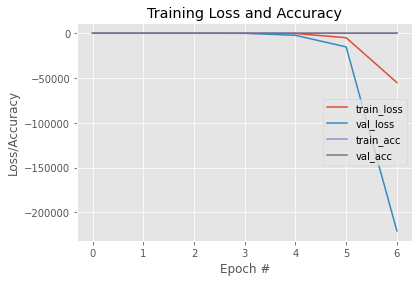

In [ ]:
import matplotlib.pyplot as plt
N = 7
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
loss, accuracy = Classifier.evaluate(test_set)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

17/17 [==============================] - 2s 95ms/step - loss: -178566.1250 - accuracy: 0.6667
Test Accuracy: 66.67%


In [ ]:
loss, accuracy = Classifier.evaluate(training_set)
print(f"Train Accuracy: {accuracy * 100:.2f}%")

63/63 [==============================] - 10s 164ms/step - loss: -154714.5625 - accuracy: 0.5498
Train Accuracy: 54.98%


In [ ]:
import pandas as pd
pred = Classifier.predict(test_set)

print(confusion_matrix(test_set.classes, pred > 0.5))
pd.DataFrame(classification_report(test_set.classes, pred > 0.5, output_dict=True))

17/17 [==============================] - 2s 92ms/step
[[10 16  0]
 [ 6 14  0]
 [ 8 12  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,accuracy,macro avg,weighted avg
precision,0.416667,0.333333,0.0,0.363636,0.250000,0.265152
recall,0.384615,0.700000,0.0,0.363636,0.361538,0.363636
f1-score,0.400000,0.451613,0.0,0.363636,0.283871,0.294428
support,26.000000,20.000000,20.0,0.363636,66.000000,66.000000


In [ ]:
print(confusion_matrix(test_set.classes, pred > 0.7))
pd.DataFrame(classification_report(test_set.classes, pred > 0.7, output_dict=True))

[[10 16  0]
 [ 6 14  0]
 [ 8 12  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,accuracy,macro avg,weighted avg
precision,0.416667,0.333333,0.0,0.363636,0.250000,0.265152
recall,0.384615,0.700000,0.0,0.363636,0.361538,0.363636
f1-score,0.400000,0.451613,0.0,0.363636,0.283871,0.294428
support,26.000000,20.000000,20.0,0.363636,66.000000,66.000000


In [ ]:
print(test_set.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
print(len(test_set))

17
